# Homework 4

## Taeho Hwang

Instructions: 

1. Replace "yourname" in the filename of this notebook, and "your name here" in this header, with your name. 
2. Complete all questions/problems. **Make sure to run all cells so that your output is visible**. 
3. Run "restart & run all" from the Kernel menu, to make sure that it's all running in order. 
4. Email me your notebook (.ipynb file) to jonathan.reeve@columbia.edu. Please don't email me archives (`.zip` or `.tar.gz`) or extra texts. Write the word "lobster" somewhere in your email, so that I know you read these instructions.

### 1. Install SpaCy and the SpaCy language model called `en_core_web_lg`. 

It is important that you get this particular language model, as the others don't have the features we'll need. 

You're welcome to work together in groups for this one (probably in groups where you all run the same operating system). 

There are installation instructions [here on the SpaCy website](https://spacy.io/usage/) that list a number of command-line commands to run. To run command-line commands: 

 - **Linux**: open a terminal. 
 - **MacOS**: open the Terminal app. (Hint: you can open Spotlight, the magnifying glass icon in the upper right, and type "terminal")
 - **Windows**: open Powershell. (Open the Start menu, then type "powershell.") Alternatively, download Git BASH, which is included in GitHub Desktop. 

Whenever you see command-line commands, they're usually prefixed with `$` or `#`. A `$` means to run the command as a regular user, and a `#` means to prefix your command with `sudo`. You'll generally only see `$`, and you're already running as a regular user, so all you'll need to do is to type in the command that follows the `$`, i.e. not including the `$`. So if the command is shown in the SpaCy docs as `$ conda install -c conda-forge spacy`, open a terminal and type `conda install -c conda-forge spacy`, exactly as written. 

When following the SpaCy instructions, you'll want to choose `conda` as your package manager (because you've installed Anaconda), and 'python3' as your Python version, since we're using Python 3 in this course. Don't select `virtualenv` unless you really know what you're doing. 

To show that you've successfully installed this stack, please run the two cells below, to show that it's not giving you errors. 

In [4]:
import spacy

In [13]:
nlp = spacy.load('en_core_web_lg')

### 2. Create the corpus that you'll use for your final project, and put it into a dictionary with labels as the keys. 

Consult [the final project instructions](https://github.com/JonathanReeve/course-computational-literary-analysis/blob/master/Resources/final-project-instructions.md#choosing-a-corpus) on choosing a corpus. Feel free to use [corpus-db.org](http://corpus-db.org) to assemble your corpus. If you need any help in using it, please ask in the chatroom! You can use it to get, say, 30 detective novels relatively easily, or 30 novels that feature young women, or 30 novels set in Paris. You can also get all the works by a certain author this way. But be careful to know exactly what texts you're getting. Project Gutenberg includes texts in a number of languages, so select your texts carefully. 

If you have a directory of text files, you can easily load all the files in your directory with `glob`, using something like:

```python
{filename: open(filename).read() for filename in glob.glob('*.txt')}
```

Stick with English texts, please. NLP in other languages is possible, but requires a different set of tokenizers and other tools that we haven't used yet in this course. It's also good idea to work with texts that are originally written in English, since translations have the problem of introducing translator's word choices to the set of word choices that the author has already made.

Your corpus should be a collection of texts, stored in one variable. However, it doesn't have to be a collection of *works*. Rather, it can be all the narratives in _The Moonstone_, all of Katherine Mansfield's stories, all of Joyce's stories, or some combination of the above, based on theme or genre. It can also be all the novels of a certain writer, or of five writers. Comparisons make for good corpora. Why not compare, say, all of our Joyce stories to all of our Mansfield stories? You'll probably want to have more than four documents, and less than a thousand, for the analyses that follow. 

You can also use certain APIs to get texts like book reviews. Use `requests.get` along with a URL you get from the API's documentation. Maybe you're interested in comparing texts and their reviews? 

Your corpus might change a little by the time you finish your final project, and that's OK, but try not to change it completely, if you can. 

Make sure to clean your corpus of paratext: tables of contents, Project Gutenberg copyright licenses, etc, since these will throw off text statistics. 

Print out just enough of your corpus to show that it's well-structured, i.e., the first 100 characters of each text. Don't do this if you have 1000 texts, though—just print out a preview of it. 

**Please don't print out the entire contents of your corpus, or include any of your text files in your homework.**

Finally, write a paragraph in Markdown where you describe your sources, and how you organized your corpus. 


In [46]:

from glob import glob
from os.path import isdir

#I cannot access to corpus.db TT
s = "/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/*.md"

filname ={filename: open(filename).read() for filename in glob(s)}
for k in filname.keys():
    print(filname[k][:100])
    print()


---
layout: narrative
title: "The Moonstone"
author: Wilkie Collins
editor: Jonathan Reeve
rights: P

# 1. AT THE BAY.
## Chapter 1.I.

Very early morning. The sun was not yet risen, and the whole of Cr



I could not access to corpus.db. so I just accessed the moonstone and the garden party to work assignment.

### 3. Calculate the length, in words, of each text in your corpus. Make a chart that shows how they compare. 

Then, in a markdown cell, write about how these different lengths may affect your analysis, and how you might counteract the effects of different text lengths. 

/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md :
1072272
233966
/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/garden-party.md :
320254
73900


<AxesSubplot:>

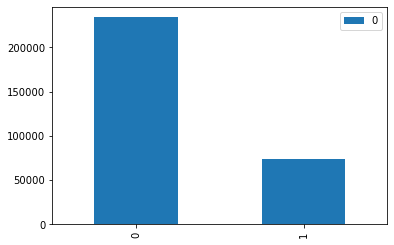

In [259]:
from nltk.tokenize import word_tokenize
import pandas as pd
lenList = []
for k, story in filname.items():
    print(k, ":")
    print(len(filname[k]))
    print(len(word_tokenize(filname[k])))
    lenList.append(len(word_tokenize(filname[k])))
pd.DataFrame(lenList).plot(kind="bar")

The moonstone uses more words than garden party. I think it is because of the moonstone's genre. The moonstone has many character so that express the many personalities.

### 4. Compute the type-token ratio for each text in your corpus. Make a chart that shows how they compare. 

Don't forget to truncate each text to a reasonable value (usually the length of your shortest text).

Then, in a markdown cell, write about what you notice.

{'/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md': 4.41546236634391, '/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/garden-party.md': 8.911752404851526}


<AxesSubplot:>

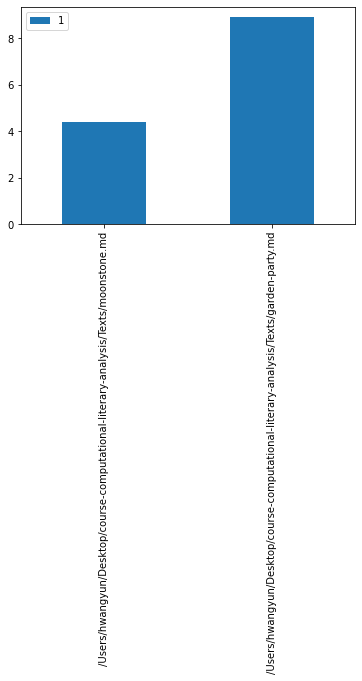

In [97]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

filDict = {}
for f in filname:
    
    document= re.sub(r'[^\w]', ' ', filname[f])
    document = document.lower()
    tokens = word_tokenize(document)
    types= Counter(tokens)
    TTR = (len(types)/len(tokens)) * 100
    filDict[f] = TTR
print(filDict)
df = pd.DataFrame(list(filDict.items()), index=list(filDict.keys()))
df.plot(kind="bar")



While Moonstone repeated the same word many times, more words were used at the garden party because several stories were introduced in fragments.

### 5. Show some frequent n-grams for each text in your corpus.

Don't print out too much—just enough to get the idea. 

Then, in a markdown cell, write about what you notice about them.

Hello


In [118]:
from nltk import ngrams
import nltk
resultList = []
for f in filname:
    print(f, ":")
    grams = ngrams(nltk.word_tokenize(filname[f].lower()), 5)
        
    for g in list(grams):
            #print(g)
        resultList.append(g)
        
    #print(Counter(resultList).most_common(10))
    print(resultList[:10])

/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md :
[('--', '-', 'layout', ':', 'narrative'), ('-', 'layout', ':', 'narrative', 'title'), ('layout', ':', 'narrative', 'title', ':'), (':', 'narrative', 'title', ':', '``'), ('narrative', 'title', ':', '``', 'the'), ('title', ':', '``', 'the', 'moonstone'), (':', '``', 'the', 'moonstone', "''"), ('``', 'the', 'moonstone', "''", 'author'), ('the', 'moonstone', "''", 'author', ':'), ('moonstone', "''", 'author', ':', 'wilkie')]
/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/garden-party.md :
[('--', '-', 'layout', ':', 'narrative'), ('-', 'layout', ':', 'narrative', 'title'), ('layout', ':', 'narrative', 'title', ':'), (':', 'narrative', 'title', ':', '``'), ('narrative', 'title', ':', '``', 'the'), ('title', ':', '``', 'the', 'moonstone'), (':', '``', 'the', 'moonstone', "''"), ('``', 'the', 'moonstone', "''", 'author'), ('the', 'moonstone', "''", 'author', ':'), ('moonstone', "''", 'au

Insert your markdown here. 

### 6. Choose a word, or an n-gram, which you think may be significant for your corpus. Make a chart that shows the proportions of that term across all the texts in your corpus. 

Make sure to use proportions, and not counts. Then, in the markdown cell, write about what you notice. 

In [145]:
for f in filname:
    print(f, ":")
    saidCount = dict(Counter(nltk.word_tokenize(filname[f].lower())))["said"]
    sumOfToken = len(nltk.word_tokenize(filname[f].lower()))
    print(saidCount/sumOfToken)




/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md :
0.003612006394747416
/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/garden-party.md :
0.006943410527455572


It is a measure of the distribution of the "said". It can be seen that more conversations have been expressed at the garden party. 

### 7. Run a comparative stylometric analysis of the texts in your corpus. 

So, make document-term matrices for your most frequent words, reduce their dimensions to 2 or 3 using PCA, and make a labeled scatter plot and/or dendrogram of the results. 

/Users/hwangyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/hwangyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


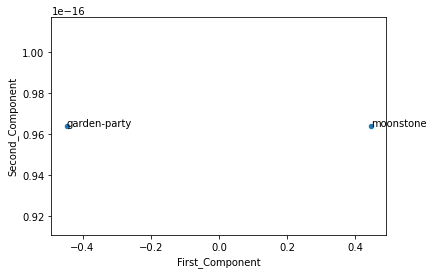

In [215]:

# Insert your code here. 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA 

tfidfVectorizer = TfidfVectorizer(stop_words='english', max_features=400, use_idf= False)
string = filname['/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md']
string2 = filname['/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/garden-party.md']

moonstoneFreq = tfidfVectorizer.fit_transform([string, string2]).todense()
moonstoneWordnames = tfidfVectorizer.get_feature_names()
pd.DataFrame(moonstoneFreq, columns=moonstoneWordnames, index=["moonstone", "garden-party"])

pca = PCA(n_components=2)
reduced = pca.fit_transform(moonstoneFreq)
reduced.shape
df = pd.DataFrame(reduced, columns=["First_Component", "Second_Component"], index=["moonstone", "garden-party"])
ax = df.plot(kind="scatter", x="First_Component", y="Second_Component")
for title, points in df.iterrows():
    ax.annotate(title, points)

Insert your markdown here. 

### 8. Add the category texts of the Brown Corpus to your stylometric analysis, and create a new visualization which includes these texts.

Then, write about how your texts compare with the texts of the Brown Corpus, and what you think that means. 

/Users/hwangyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/hwangyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


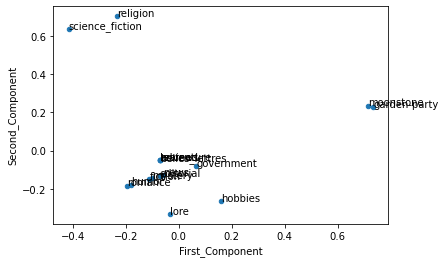

In [255]:
from nltk.corpus import brown


tfidfVectorizer = TfidfVectorizer(stop_words='english', max_features=400, use_idf= False)
categories = brown.categories()
strings = []
for c in categories:
    for s in brown.sents(categories=c):
        word = " ".join(s)
    #print(word)
    strings.append(word)
string = filname['/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md']
string2 = filname['/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/garden-party.md']
strings.append(string)
strings.append(string2)
categories.append("moonstone")
categories.append("garden-party")

Freq = tfidfVectorizer.fit_transform(strings).todense()
Wordnames = tfidfVectorizer.get_feature_names()
pd.DataFrame(Freq, columns=Wordnames, index=categories)

pca = PCA(n_components=2)
reduced = pca.fit_transform(Freq)
# print(Wordnames)
# print(reduced)
df = pd.DataFrame(reduced, columns=["First_Component", "Second_Component"], index =categories)
ax = df.plot(kind="scatter", x="First_Component", y="Second_Component")
for title, points in df.iterrows():
    ax.annotate(title, points)

Insert your markdown here. 

### 9. Repeat your analysis from #7, only this time, use semantic words rather than syntactic words. 

In other words, instead of choosing the top 800 most frequent words, or whatever that number is for your texts, choose all the *other* words, which will be the content words. You may want to limit your selection to words that are in all documents, e.g., by setting `min_df` to `1.0` in `TfIdfVectorizer`. 

You'll want to look through the word frequency lists for your corpus to determine where semantic words start in your ranked list of words (after the thousandth most frequent word, maybe?). 

Write about what you found. 

In [ ]:
# Insert your code here. 

Insert your markdown here. 

### 10. Topic-model your corpus using LDA, and create a chart which shows some topics. 

Experiment with different parameters until you find the ones that give you the most interpretable results. 

In [ ]:
# Insert your code here. 

Insert your markdown here. 

### Bonus: Make a simple genre categorizer that tries to guess the genre of a text, based on word frequencies derived from the Brown corpus. Test it on all of Mansfield's stories that we've read. 

Then, write about why you think your categorizer guessed those genres for these stories. 

In [ ]:
# Insert your code here. 

Insert your markdown here. 